# Step 1 | Data info


In [ ]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Visualization

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Preprocessing

from sklearn.preprocessing import (
    LabelEncoder, StandardScaler, MinMaxScaler, PolynomialFeatures
)

# Model Selection

from sklearn.model_selection import (
    train_test_split, StratifiedKFold,
    GridSearchCV, RandomizedSearchCV,
    cross_val_score, learning_curve
)

# Metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score,
    confusion_matrix, classification_report,
    roc_curve, precision_recall_curve
)

# Machine Learning Models

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import (
    RandomForestClassifier, GradientBoostingClassifier,
    AdaBoostClassifier, ExtraTreesClassifier,
    BaggingClassifier, VotingClassifier, StackingClassifier
)
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import (
    LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
)
from sklearn.neural_network import MLPClassifier
# Boosting Models
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# Custom Pipeline
from ml_pipline import ChurnMLPipeline

### Step 1.1 | Load data


In [2]:
df = pd.read_csv("churn_data.csv") 

----------------

### Step 1.2 | data info 


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


------------------------------------------

### Step 1.3 | print frist 5 rows data


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Step 1.4 | describe data


In [5]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### ASE Stock Data - Exploratory Data Analysis (EDA) Report

In [6]:
from ydata_profiling import ProfileReport 
profile = ProfileReport(
    df,
    title="Telco Customer Churn - EDA Report",
    explorative=True,
    correlations={
        "pearson": {"calculate": True},
        "spearman": {"calculate": True}
    }
)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

100%|██████████| 21/21 [00:00<00:00, 308.83it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Step 2 | Preprocessing

### Step 2.1 | Handle Missing Values


Check missing values :)

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

----------------------------------

 Drop missing rows

In [8]:
df.dropna(inplace=True)

### Step 2.2 | Handle duplicated rows

Check duplicated rows

In [9]:
df.duplicated().sum()

0

drop duplicated rows

In [10]:
df = df.drop_duplicates()

### Step 2.3 | Clean column names


In [11]:
df.columns = df.columns.str.strip()

### Step 2.4 | Convert numerical columns


Convert TotalCharges to numeric


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].fillna(df['TotalCharges'].median(), inplace=True)

Convert numerical columns


In [13]:
df['tenure'] = pd.to_numeric(df['tenure'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')
df['SeniorCitizen'] = pd.to_numeric(df['SeniorCitizen'], errors='coerce')

In [14]:
print(f" Missing values handled")
print(f" Numerical conversions done")
print(f"\nDataset Info:")
df.info()

 Missing values handled
 Numerical conversions done

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043

# Step 3 | Visualization

### CHURN DISTRIBUTION

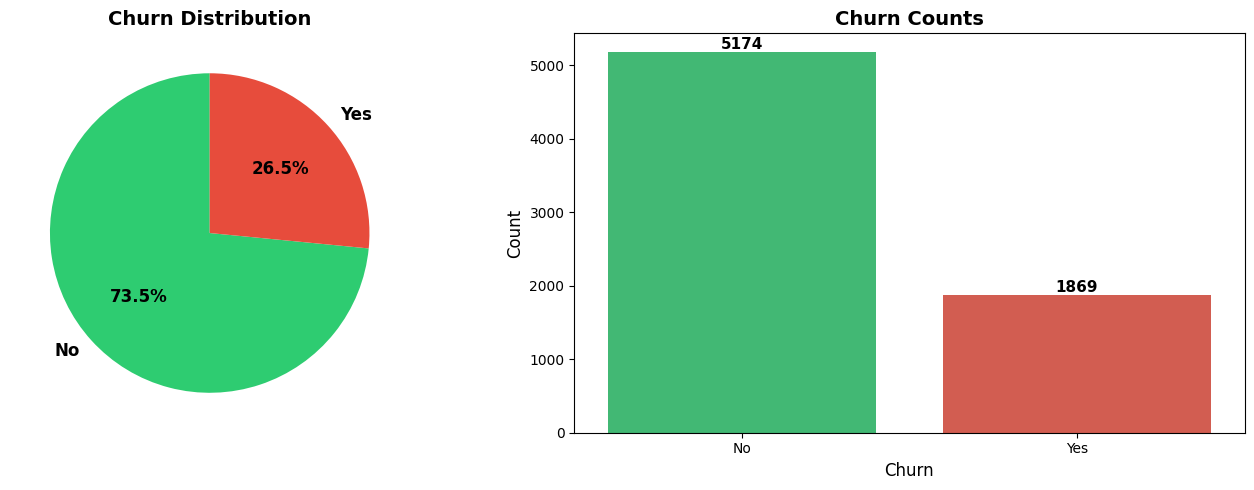

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Pie chart
churn_counts = df['Churn'].value_counts()
colors = ['#2ecc71', '#e74c3c']
ax[0].pie(churn_counts.values, labels=churn_counts.index, autopct='%1.1f%%',
          colors=colors, startangle=90, textprops={'fontsize': 12, 'weight': 'bold'})
ax[0].set_title('Churn Distribution', fontsize=14, fontweight='bold')

# Count plot
sns.countplot(data=df, x='Churn', palette=colors, ax=ax[1])
ax[1].set_title('Churn Counts', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Churn', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)

for container in ax[1].containers:
    ax[1].bar_label(container, fontsize=11, weight='bold')

plt.tight_layout()
plt.show()

### CHURN BY CONTRACT TYPE

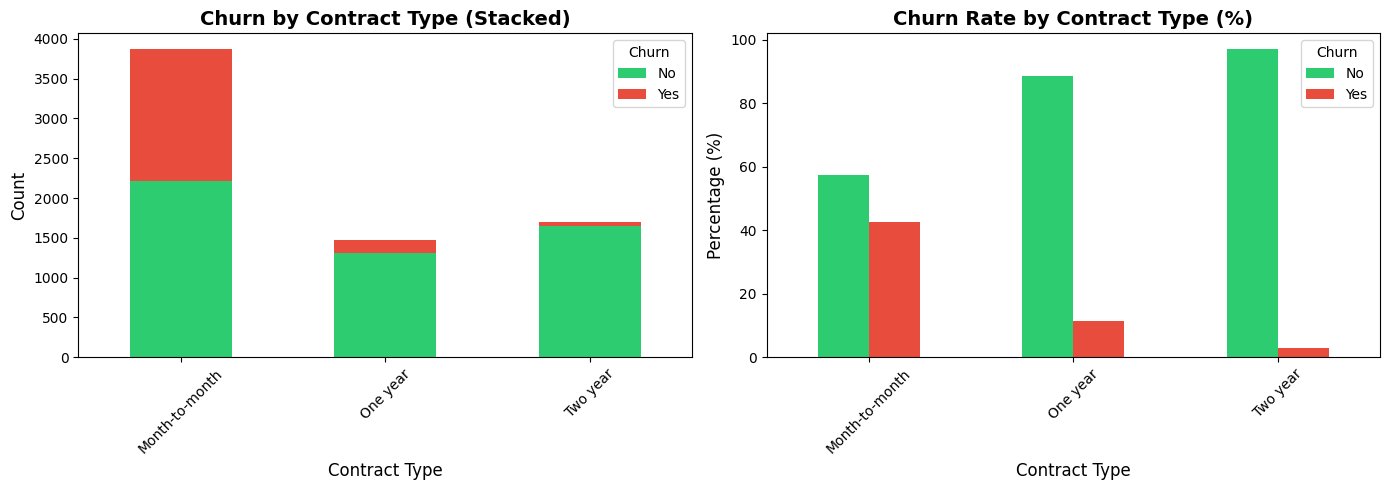

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar chart
contract_churn = pd.crosstab(df['Contract'], df['Churn'])
contract_churn.plot(kind='bar', stacked=True, color=colors, ax=ax[0])
ax[0].set_title('Churn by Contract Type (Stacked)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Contract Type', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].legend(title='Churn', labels=['No', 'Yes'])
ax[0].tick_params(axis='x', rotation=45)

# Percentage bar chart
contract_pct = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_pct.plot(kind='bar', color=colors, ax=ax[1])
ax[1].set_title('Churn Rate by Contract Type (%)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Contract Type', fontsize=12)
ax[1].set_ylabel('Percentage (%)', fontsize=12)
ax[1].legend(title='Churn', labels=['No', 'Yes'])
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### CHURN BY INTERNET SERVICE

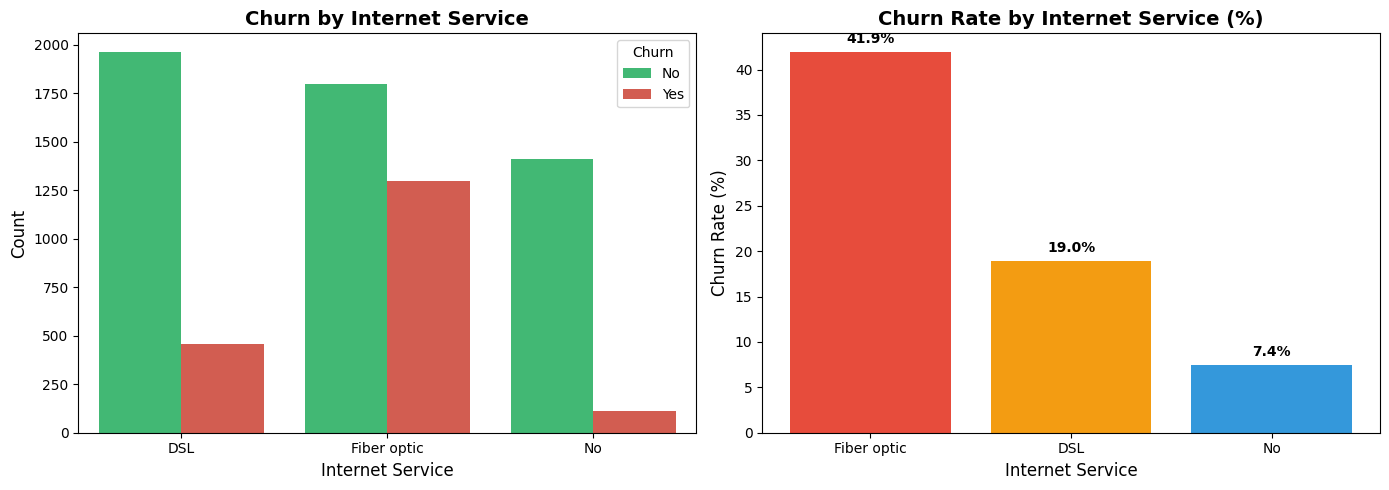

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
sns.countplot(data=df, x='InternetService', hue='Churn', palette=colors, ax=ax[0])
ax[0].set_title('Churn by Internet Service', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Internet Service', fontsize=12)
ax[0].set_ylabel('Count', fontsize=12)
ax[0].legend(title='Churn', labels=['No', 'Yes'])

# Churn rate
internet_churn = df.groupby('InternetService')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).sort_values(ascending=False)

ax[1].bar(internet_churn.index, internet_churn.values, color=['#e74c3c', '#f39c12', '#3498db'])
ax[1].set_title('Churn Rate by Internet Service (%)', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Internet Service', fontsize=12)
ax[1].set_ylabel('Churn Rate (%)', fontsize=12)

# Add value labels
for i, v in enumerate(internet_churn.values):
    ax[1].text(i, v + 1, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

### CHURN BY PAYMENT METHOD


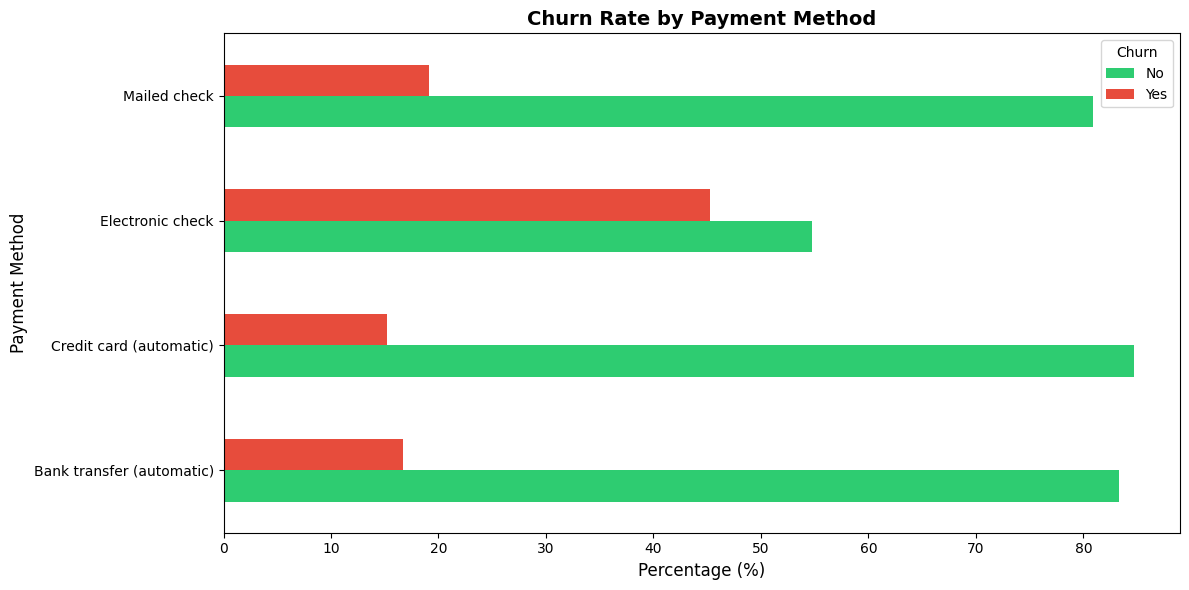

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))

payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='barh', color=colors, ax=ax)
ax.set_title('Churn Rate by Payment Method', fontsize=14, fontweight='bold')
ax.set_xlabel('Percentage (%)', fontsize=12)
ax.set_ylabel('Payment Method', fontsize=12)
ax.legend(title='Churn', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()

### TENURE DISTRIBUTION

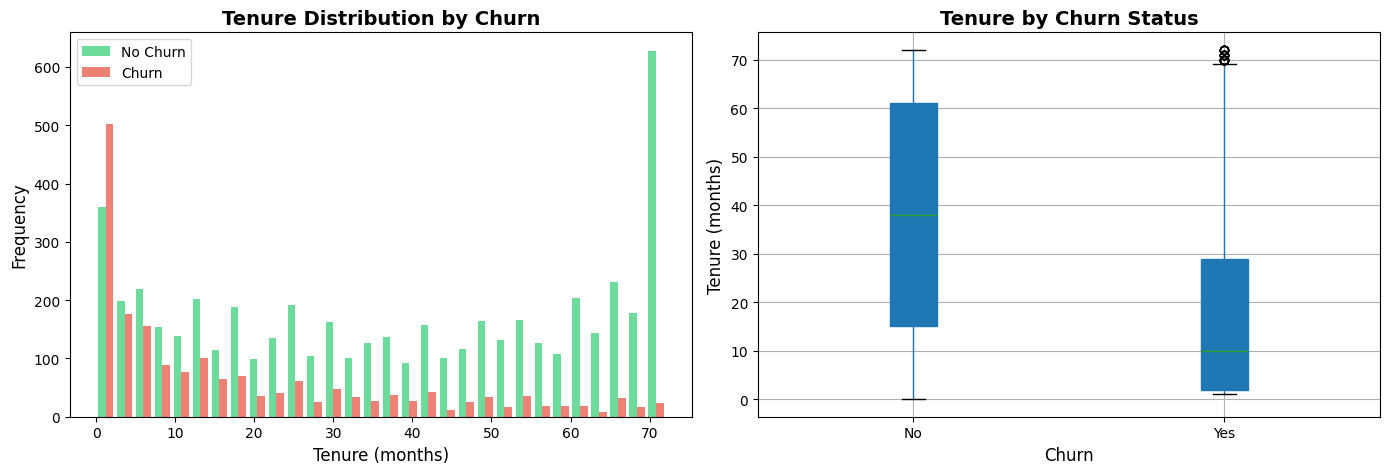

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax[0].hist([df[df['Churn']=='No']['tenure'], df[df['Churn']=='Yes']['tenure']], 
           bins=30, label=['No Churn', 'Churn'], color=colors, alpha=0.7)
ax[0].set_title('Tenure Distribution by Churn', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Tenure (months)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].legend()

# Box plot
df.boxplot(column='tenure', by='Churn', ax=ax[1], patch_artist=True)
ax[1].set_title('Tenure by Churn Status', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Churn', fontsize=12)
ax[1].set_ylabel('Tenure (months)', fontsize=12)
plt.suptitle('')

plt.tight_layout()
plt.show()

 ### MONTHLY CHARGES DISTRIBUTION

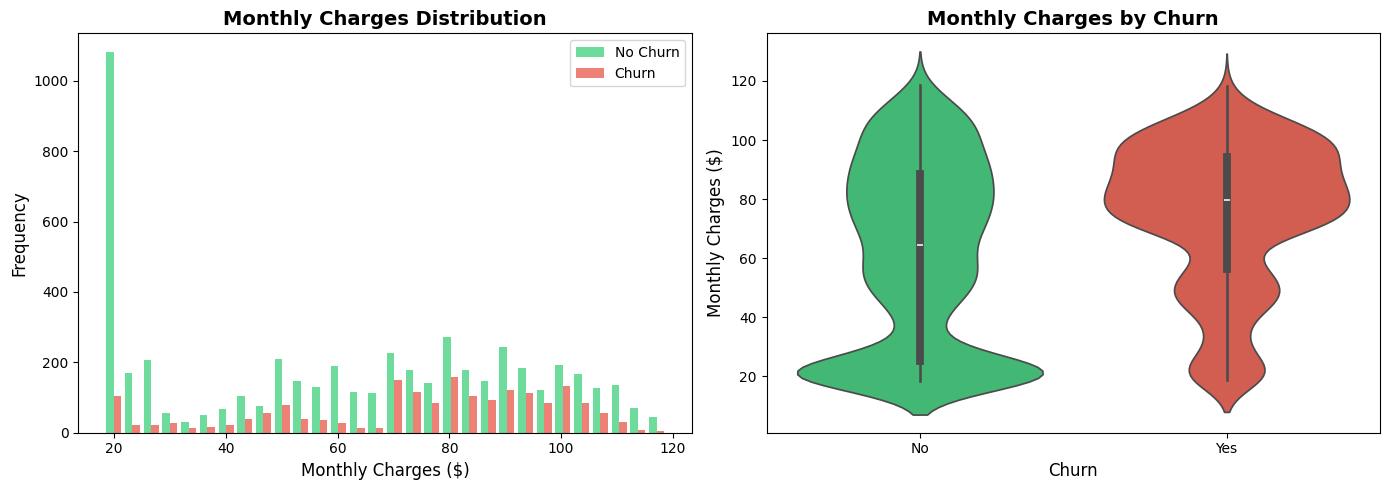

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
ax[0].hist([df[df['Churn']=='No']['MonthlyCharges'], 
            df[df['Churn']=='Yes']['MonthlyCharges']], 
           bins=30, label=['No Churn', 'Churn'], color=colors, alpha=0.7)
ax[0].set_title('Monthly Charges Distribution', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Monthly Charges ($)', fontsize=12)
ax[0].set_ylabel('Frequency', fontsize=12)
ax[0].legend()

# Violin plot
sns.violinplot(data=df, x='Churn', y='MonthlyCharges', palette=colors, ax=ax[1])
ax[1].set_title('Monthly Charges by Churn', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Churn', fontsize=12)
ax[1].set_ylabel('Monthly Charges ($)', fontsize=12)

plt.tight_layout()
plt.show()

### TOTAL CHARGES DISTRIBUTION

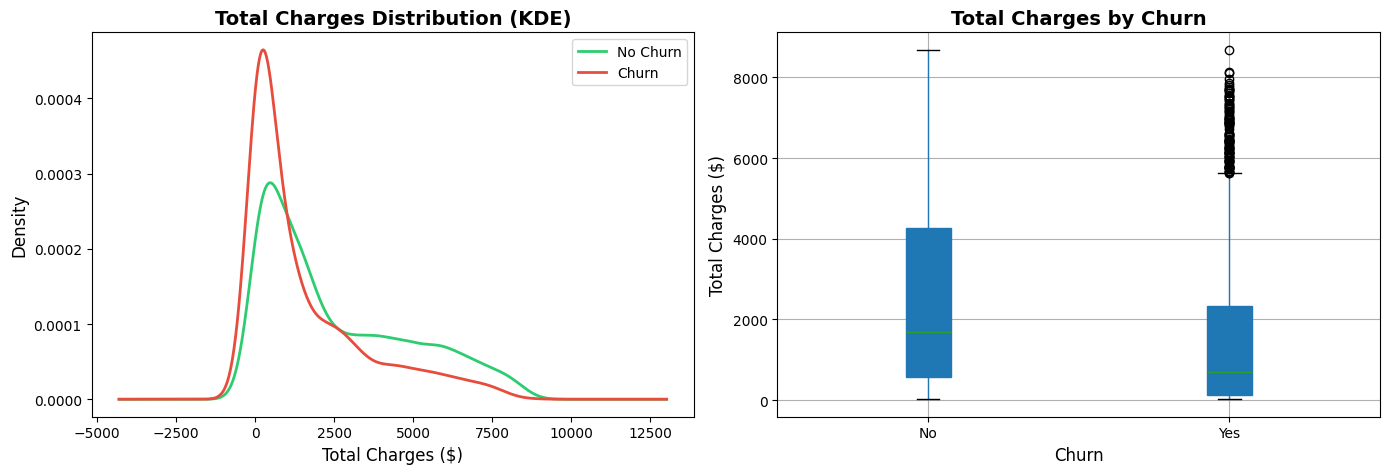

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# KDE plot
df[df['Churn']=='No']['TotalCharges'].plot(kind='kde', label='No Churn', 
                                             color=colors[0], linewidth=2, ax=ax[0])
df[df['Churn']=='Yes']['TotalCharges'].plot(kind='kde', label='Churn', 
                                              color=colors[1], linewidth=2, ax=ax[0])
ax[0].set_title('Total Charges Distribution (KDE)', fontsize=14, fontweight='bold')
ax[0].set_xlabel('Total Charges ($)', fontsize=12)
ax[0].set_ylabel('Density', fontsize=12)
ax[0].legend()

# Box plot
df.boxplot(column='TotalCharges', by='Churn', ax=ax[1], patch_artist=True)
ax[1].set_title('Total Charges by Churn', fontsize=14, fontweight='bold')
ax[1].set_xlabel('Churn', fontsize=12)
ax[1].set_ylabel('Total Charges ($)', fontsize=12)
plt.suptitle('')

plt.tight_layout()
plt.show()


### CHURN BY DEMOGRAPHIC FEATURES

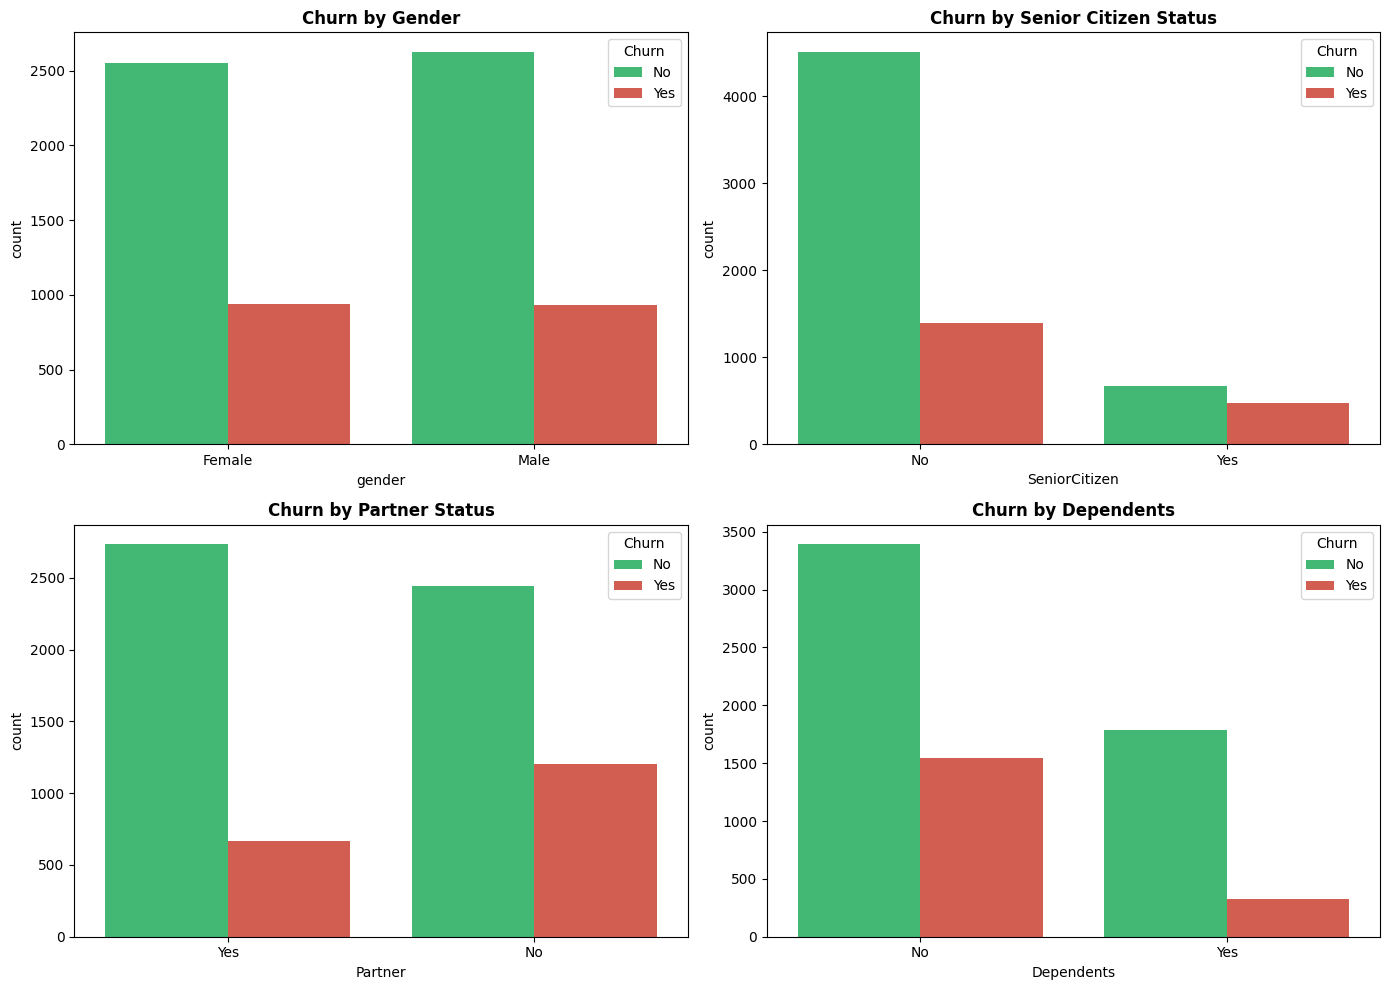

In [22]:
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Gender
sns.countplot(data=df, x='gender', hue='Churn', palette=colors, ax=ax[0, 0])
ax[0, 0].set_title('Churn by Gender', fontsize=12, fontweight='bold')

# Senior Citizen
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette=colors, ax=ax[0, 1])
ax[0, 1].set_title('Churn by Senior Citizen Status', fontsize=12, fontweight='bold')
ax[0, 1].set_xticklabels(['No', 'Yes'])

# Partner
sns.countplot(data=df, x='Partner', hue='Churn', palette=colors, ax=ax[1, 0])
ax[1, 0].set_title('Churn by Partner Status', fontsize=12, fontweight='bold')

# Dependents
sns.countplot(data=df, x='Dependents', hue='Churn', palette=colors, ax=ax[1, 1])
ax[1, 1].set_title('Churn by Dependents', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### CHURN BY SERVICES

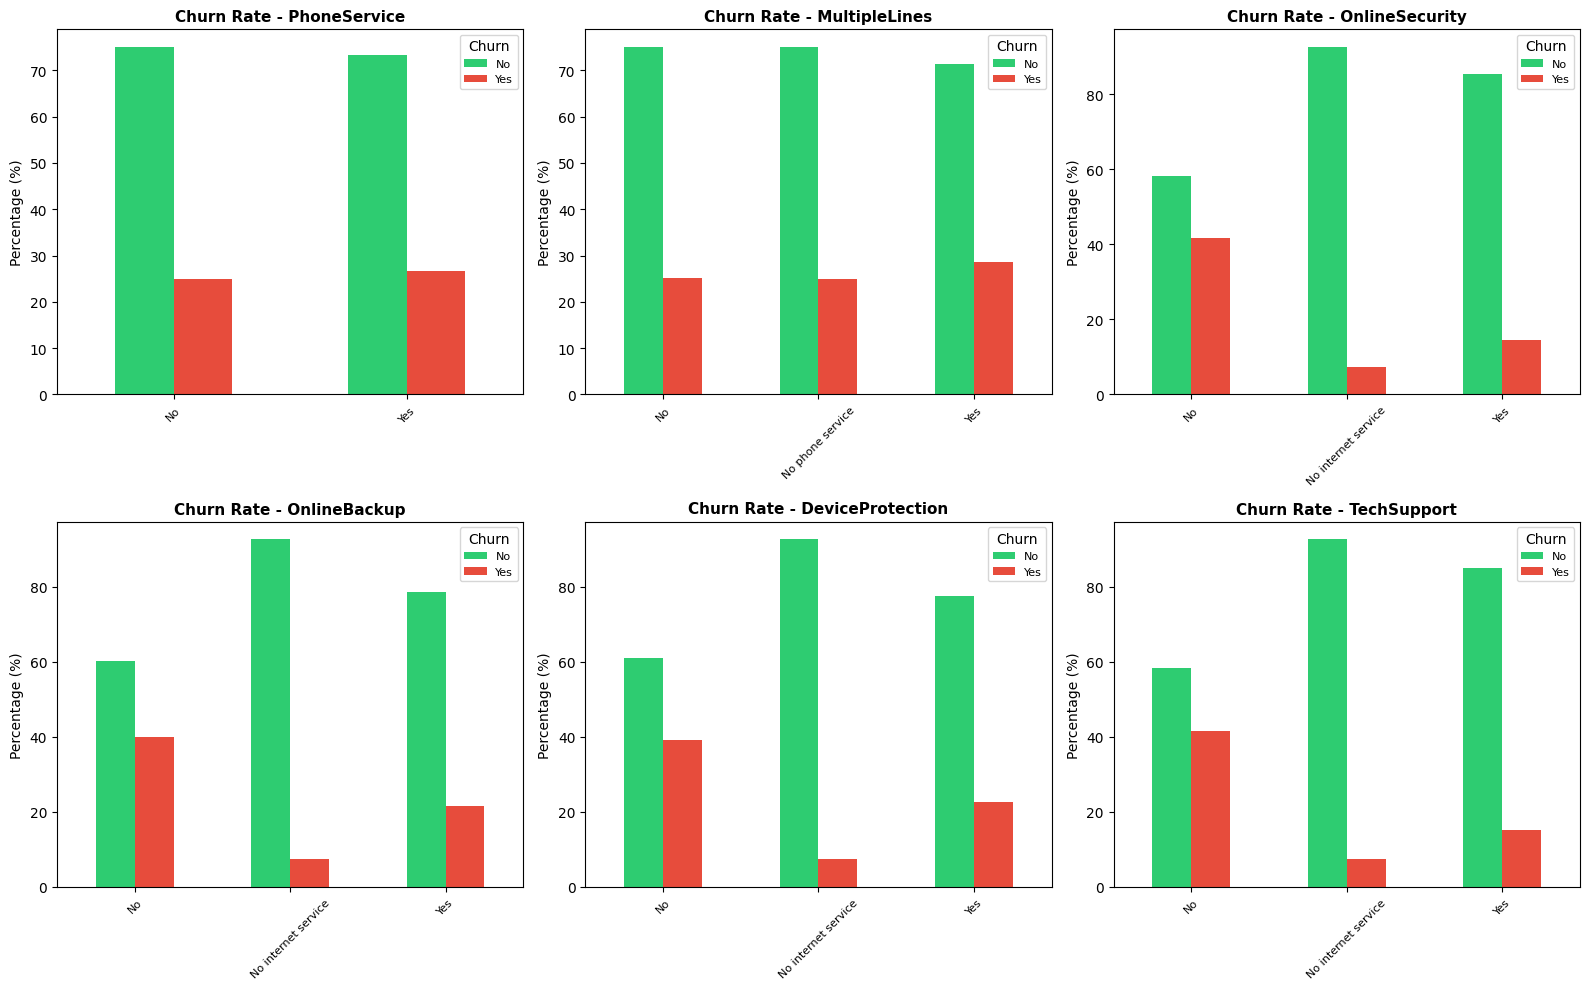

In [23]:
fig, ax = plt.subplots(2, 3, figsize=(16, 10))

services = ['PhoneService', 'MultipleLines', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport']

for idx, service in enumerate(services):
    row = idx // 3
    col = idx % 3
    
    service_churn = pd.crosstab(df[service], df['Churn'], normalize='index') * 100
    service_churn.plot(kind='bar', color=colors, ax=ax[row, col])
    ax[row, col].set_title(f'Churn Rate - {service}', fontsize=11, fontweight='bold')
    ax[row, col].set_xlabel('')
    ax[row, col].set_ylabel('Percentage (%)', fontsize=10)
    ax[row, col].legend(title='Churn', labels=['No', 'Yes'], fontsize=8)
    ax[row, col].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()

### CORRELATION HEATMAP

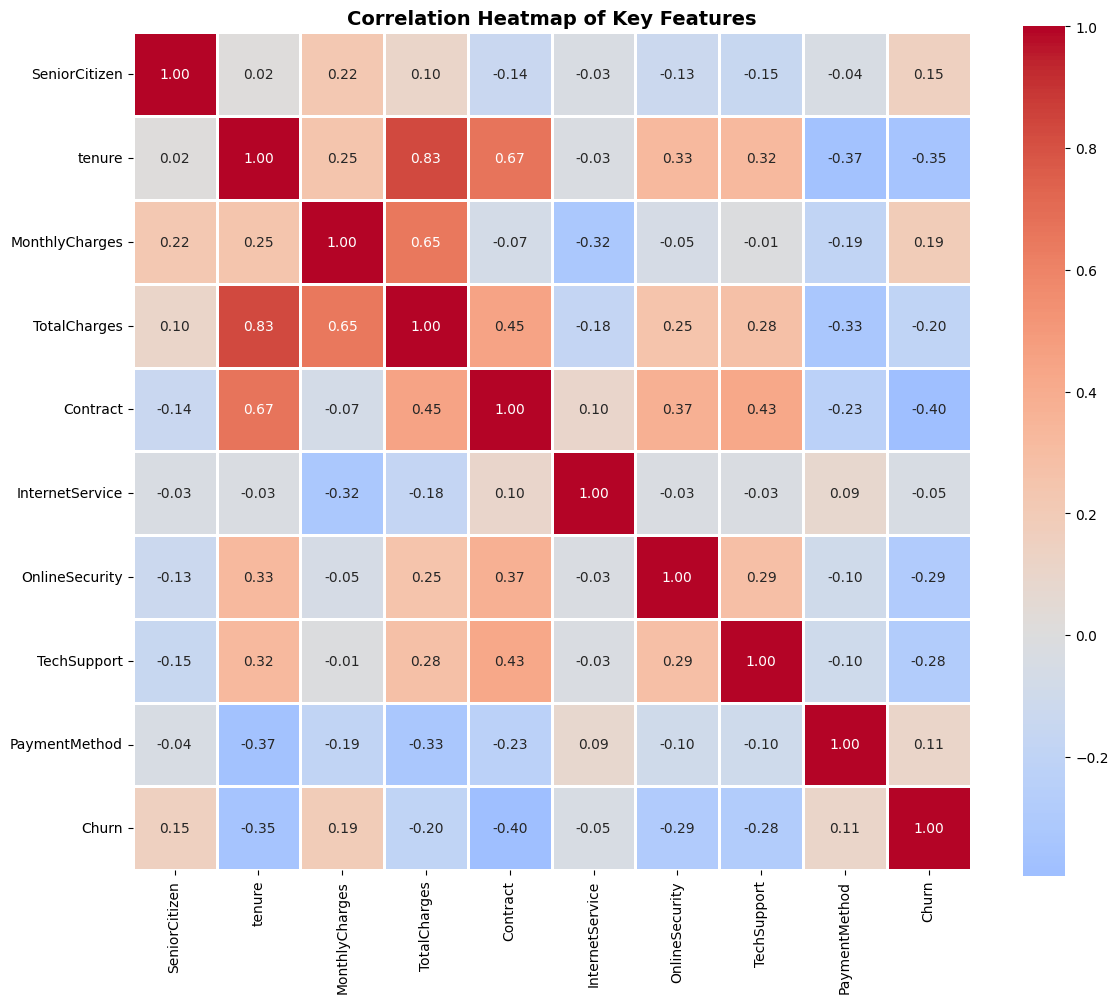

In [24]:
df_corr = df.copy()
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables for correlation
le = LabelEncoder()
for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = le.fit_transform(df_corr[col].astype(str))

# Select relevant features
corr_features = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 
                 'Contract', 'InternetService', 'OnlineSecurity', 'TechSupport',
                 'PaymentMethod', 'Churn']

correlation = df_corr[corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', center=0, 
            fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Heatmap of Key Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Step 5 | machine learning 

## DATA PREPARATION FOR MODELING

### DATA TYPE CONVERSION

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from ml_pipline import ChurnMLPipeline

df = pd.read_csv('churn_data.csv')
df_model = df.copy()
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for col in numeric_columns:
    if col in df_model.columns:
        original_dtype = df_model[col].dtype
        df_model[col] = pd.to_numeric(df_model[col], errors='coerce')

if df_model.isnull().sum().sum() > 0:
    rows_before = len(df_model)
    df_model = df_model.dropna()
    rows_after = len(df_model)

### FEATURE ENGINEERING

In [26]:
service_cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                'TechSupport', 'StreamingTV', 'StreamingMovies']
existing_service_cols = [col for col in service_cols if col in df_model.columns]

if existing_service_cols:
    df_model['TotalServices'] = df_model[existing_service_cols].apply(
        lambda x: (x == 'Yes').sum(), axis=1
    )
df_model['customer_lifetime_value'] = df_model['tenure'] * df_model['MonthlyCharges']
df_model['avg_monthly_spend'] = df_model['TotalCharges'] / (df_model['tenure'] + 1)
df_model['tenure_group'] = pd.cut(
    df_model['tenure'],
    bins=[0, 12, 24, 48, 100],
    labels=[0, 1, 2, 3]  # 0-1yr, 1-2yr, 2-4yr, 4+yr
)
df_model['tenure_group'] = df_model['tenure_group'].astype(int)
df_model['charges_group'] = pd.cut(
    df_model['MonthlyCharges'],
    bins=[0, 35, 65, 90, 150],
    labels=[0, 1, 2, 3]  # Low, Medium, High, Very High
)
df_model['charges_group'] = df_model['charges_group'].astype(int)
df_model['service_value_ratio'] = df_model['TotalServices'] / (df_model['MonthlyCharges'] + 1)
df_model['is_high_value'] = (
    (df_model['tenure'] > 24) & 
    (df_model['MonthlyCharges'] > 70)
).astype(int)
df_model['tenure_stability'] = df_model['tenure'] / (df_model['MonthlyCharges'] / 10 + 1)
if 'Contract' in df_model.columns:
    df_model['long_term_contract'] = (df_model['Contract'] != 'Month-to-month').astype(int)
df_model['payment_burden'] = df_model['MonthlyCharges'] / (df_model['tenure'] + 1)
df_model['charges_per_service'] = df_model['TotalCharges'] / (df_model['TotalServices'] + 1)
print(f" New shape: {df_model.shape}")


 New shape: (7032, 32)


### ENCODE TARGET VARIABLE

In [27]:
target_column = 'Churn'

if df_model[target_column].dtype == 'object':
    print(f"Original values: {df_model[target_column].unique()}")
    df_model[target_column] = df_model[target_column].map({'Yes': 1, 'No': 0})
    print(f" Encoded '{target_column}' to binary (Yes=1, No=0)")

print(f"Class distribution:")
print(df_model[target_column].value_counts())
churn_rate = df_model[target_column].mean()
print(f"Churn rate: {churn_rate:.2%}")
class_ratio = (1 - churn_rate) / churn_rate
print(f"Class imbalance ratio: {class_ratio:.2f}")

Original values: ['No' 'Yes']
 Encoded 'Churn' to binary (Yes=1, No=0)
Class distribution:
Churn
0    5163
1    1869
Name: count, dtype: int64
Churn rate: 26.58%
Class imbalance ratio: 2.76


### ENCODE CATEGORICAL VARIABLES

In [28]:
categorical_cols = df_model.select_dtypes(include=['object', 'category']).columns.tolist()
columns_to_exclude = ['customerID', target_column]
for col in columns_to_exclude:
    if col in categorical_cols:
        categorical_cols.remove(col)

print(f"Found {len(categorical_cols)} categorical columns to encode:")
for col in categorical_cols:
    print(f"  - {col}: {df_model[col].nunique()} unique values")

for col in categorical_cols:
    le = LabelEncoder()
    df_model[col] = le.fit_transform(df_model[col].astype(str))


Found 15 categorical columns to encode:
  - gender: 2 unique values
  - Partner: 2 unique values
  - Dependents: 2 unique values
  - PhoneService: 2 unique values
  - MultipleLines: 3 unique values
  - InternetService: 3 unique values
  - OnlineSecurity: 3 unique values
  - OnlineBackup: 3 unique values
  - DeviceProtection: 3 unique values
  - TechSupport: 3 unique values
  - StreamingTV: 3 unique values
  - StreamingMovies: 3 unique values
  - Contract: 3 unique values
  - PaperlessBilling: 2 unique values
  - PaymentMethod: 4 unique values


### PREPARE X AND y

In [29]:
columns_to_drop = [target_column]
if 'customerID' in df_model.columns:
    columns_to_drop.append('customerID')

X = df_model.drop(columns=columns_to_drop, errors='ignore')
y = df_model[target_column]
for i, col in enumerate(X.columns, 1):
    print(f"  {i:2d}. {col}")

# Handle missing values
missing_count = X.isnull().sum().sum()
if missing_count > 0:
    print(f"\n  Found {missing_count} missing values")
    print("Filling missing values with median...")
    X = X.fillna(X.median())
    print(" Missing values handled")

   1. gender
   2. SeniorCitizen
   3. Partner
   4. Dependents
   5. tenure
   6. PhoneService
   7. MultipleLines
   8. InternetService
   9. OnlineSecurity
  10. OnlineBackup
  11. DeviceProtection
  12. TechSupport
  13. StreamingTV
  14. StreamingMovies
  15. Contract
  16. PaperlessBilling
  17. PaymentMethod
  18. MonthlyCharges
  19. TotalCharges
  20. TotalServices
  21. customer_lifetime_value
  22. avg_monthly_spend
  23. tenure_group
  24. charges_group
  25. service_value_ratio
  26. is_high_value
  27. tenure_stability
  28. long_term_contract
  29. payment_burden
  30. charges_per_service


### FEATURE SELECTION

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

print("Training Random Forest for feature importance...")
rf_selector = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    n_jobs=-1,
    class_weight='balanced'
)
rf_selector.fit(X, y)

feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

print("\n📊 Feature Importance Ranking:")
print("="*70)
for idx, row in feature_importance.iterrows():
    bar_length = int(row['importance'] * 100)
    bar = '█' * bar_length
    print(f"  {row['feature']:30s} | {bar} {row['importance']:.6f}")

# Select top features (keep top 60% instead of median)
selector = SelectFromModel(
    rf_selector, 
    threshold='0.4*mean',  # More permissive than median
    prefit=True
)
X_selected = selector.transform(X)

selected_mask = selector.get_support()
selected_features = X.columns[selected_mask].tolist()
removed_features = X.columns[~selected_mask].tolist()

print(f"\n" + "="*70)
print(f" Original features: {X.shape[1]}")
print(f" Selected features: {len(selected_features)}")
print(f" Removed features: {len(removed_features)}")

if removed_features:
    print(f"\n🗑️  Removed low-importance features:")
    for feat in removed_features:
        imp = feature_importance[feature_importance['feature'] == feat]['importance'].values[0]
        print(f"  - {feat:30s} (importance: {imp:.6f})")

X = pd.DataFrame(X_selected, columns=selected_features, index=X.index)

print(f"\n Feature selection complete!")
print(f" New X shape: {X.shape}")

Training Random Forest for feature importance...

📊 Feature Importance Ranking:
  payment_burden                 | ███████████ 0.113989
  tenure_stability               | ████████ 0.085535
  MonthlyCharges                 | ███████ 0.071451
  Contract                       | ██████ 0.069359
  charges_per_service            | ██████ 0.069355
  avg_monthly_spend              | ██████ 0.068305
  TotalCharges                   | ██████ 0.065408
  long_term_contract             | ██████ 0.063486
  customer_lifetime_value        | █████ 0.058796
  service_value_ratio            | █████ 0.053340
  tenure                         | ████ 0.042510
  OnlineSecurity                 | ██ 0.027926
  PaymentMethod                  | ██ 0.027082
  TechSupport                    | █ 0.019534
  InternetService                | █ 0.017822
  PaperlessBilling               | █ 0.014672
  gender                         | █ 0.013682
  TotalServices                  | █ 0.012308
  tenure_group                 

### APPLY SMOTE FOR CLASS BALANCE

In [31]:
try:
    from imblearn.over_sampling import SMOTE
    
    print("Applying SMOTE (Synthetic Minority Over-sampling)...")
    
    # Apply SMOTE
    smote = SMOTE(
        random_state=42,
        k_neighbors=5,
        sampling_strategy='auto'  # Balance to 1:1 ratio
    )
    
    X_resampled, y_resampled = smote.fit_resample(X, y)
    
    print(f"\n Before SMOTE:")
    print(f"  Total samples: {len(y)}")
    print(f"  Class 0 (No Churn): {(y == 0).sum()}")
    print(f"  Class 1 (Churn): {(y == 1).sum()}")
    print(f"  Ratio: {class_ratio:.2f}:1")
    
    print(f"\n After SMOTE:")
    print(f"  Total samples: {len(y_resampled)}")
    print(f"  Class 0 (No Churn): {(y_resampled == 0).sum()}")
    print(f"  Class 1 (Churn): {(y_resampled == 1).sum()}")
    print(f"  Ratio: 1:1 (Balanced!)")
    
    # Use resampled data
    X = pd.DataFrame(X_resampled, columns=X.columns)
    y = y_resampled
    
    print(f"\n SMOTE applied successfully!")
    print(f" Expected F1 improvement: +5-10%")
    
except ImportError:
    print("\n  WARNING: imbalanced-learn not installed!")
    print("Install with: pip install imbalanced-learn")
    print("Continuing without SMOTE (results will be lower)...")

Applying SMOTE (Synthetic Minority Over-sampling)...

 Before SMOTE:
  Total samples: 7032
  Class 0 (No Churn): 5163
  Class 1 (Churn): 1869
  Ratio: 2.76:1

 After SMOTE:
  Total samples: 10326
  Class 0 (No Churn): 5163
  Class 1 (Churn): 5163
  Ratio: 1:1 (Balanced!)

 SMOTE applied successfully!
 Expected F1 improvement: +5-10%


### INITIALIZE AND RUN PIPELINE

In [32]:
pipeline = ChurnMLPipeline(
    X=X,
    y=y, 
    test_size=0.2, 
    random_state=42,
    output_dir='powerbi_exports'
)


pipeline.verify_data()

pipeline.prepare_train_test()
print("\n  NOTE: Cross-validation may take several minutes...")
print("Testing fold configurations: [2, 3, 4, 5]")
cv_df = pipeline.cross_validate_all_models(fold_configs=[2, 3, 4, 5])
best_configs = pipeline.find_best_fold_config()
pipeline.train_with_best_folds(best_configs)

results_df = pipeline.export_consolidated_results()

pipeline.create_data_dictionary()



pipeline.print_final_summary()


# Best model details
if pipeline.best_model_name:
    print(f"\n BEST MODEL: {pipeline.best_model_name}")
    print("="*60)
    
    best_results = pipeline.all_results[pipeline.best_model_name]
    for key, value in best_results.items():
        if isinstance(value, float):
            print(f"  {key:25s}: {value:.4f}")
        else:
            print(f"  {key:25s}: {value}")

# All trained models
print(f"\n ALL TRAINED MODELS ({len(pipeline.trained_models)}):")
print("="*60)
for i, model_name in enumerate(pipeline.trained_models.keys(), 1):
    f1 = pipeline.all_results[model_name]['f1']
    auc = pipeline.all_results[model_name]['auc']
    folds = pipeline.all_results[model_name]['best_n_folds']
    print(f"  {i:2d}. {model_name:20s} | F1={f1:.4f} | AUC={auc:.4f} | Folds={folds}")

# Failed models
if pipeline.failed_models:
    print(f"\n FAILED MODELS ({len(pipeline.failed_models)}):")
    print("="*60)
    for model_name in pipeline.failed_models:
        print(f"  - {model_name}")

# Cross-validation summary
print(f"\n CROSS-VALIDATION SUMMARY:")
print("="*60)
cv_summary = cv_df.groupby(['model_name', 'n_folds']).agg({
    'f1_score': ['mean', 'std', 'min', 'max']
}).reset_index()
cv_summary.columns = ['model_name', 'n_folds', 'f1_mean', 'f1_std', 'f1_min', 'f1_max']
print(cv_summary.head(10).to_string(index=False))




STEP 8: RUNNING COMPLETE PIPELINE

STEP 1: VERIFYING DATA
 X shape: (10326, 17)
 y shape: (10326,)
 Features: 17
 Samples: 10326

Class distribution:
Churn
0    5163
1    5163
Name: count, dtype: int64
Churn rate: 50.00%

 Missing values: 0

 Data is ready for modeling!

STEP 2: PREPARING TRAIN/TEST SPLIT
 Train size: 8260
 Test size: 2066

  NOTE: Cross-validation may take several minutes...
Testing fold configurations: [2, 3, 4, 5]

STEP 3: CROSS-VALIDATION ANALYSIS
Testing fold configurations: [2, 3, 4, 5]

TESTING WITH 2 FOLDS

LightGBM (2 folds)...  Mean F1=0.8502, Std=0.0033

Bagging (2 folds)...  Mean F1=0.8457, Std=0.0033

XGBoost (2 folds)...  Mean F1=0.8514, Std=0.0070

MLP (2 folds)...  Mean F1=0.8225, Std=0.0066

DecisionTree (2 folds)...  Mean F1=0.7985, Std=0.0054

KNN (2 folds)...  Mean F1=0.8057, Std=0.0007

QDA (2 folds)...  Mean F1=0.7853, Std=0.0063

LDA (2 folds)...  Mean F1=0.7747, Std=0.0081

NaiveBayes (2 folds)...  Mean F1=0.7721, Std=0.0067

SGD (2 folds)...  

In [33]:
try:
    import matplotlib.pyplot as plt
    
    print("\n" + "="*80)
    print("CREATING QUICK VISUALIZATIONS")
    print("="*80)
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')
    results_df['f1'] = pd.to_numeric(results_df['f1'], errors='coerce')
    results_df['auc'] = pd.to_numeric(results_df['auc'], errors='coerce')
    results_df['training_time'] = pd.to_numeric(results_df['training_time'], errors='coerce')
    results_df['best_n_folds'] = pd.to_numeric(results_df['best_n_folds'], errors='coerce')
    top_models = results_df.nlargest(10, 'f1')
    axes[0, 0].barh(top_models['model_name'], top_models['f1'], color='steelblue')
    axes[0, 0].set_xlabel('F1 Score')
    axes[0, 0].set_title('Top 10 Models - F1 Score')
    axes[0, 0].invert_yaxis()
    axes[0, 0].grid(axis='x', alpha=0.3)
    
    # AUC Scores
    axes[0, 1].barh(top_models['model_name'], top_models['auc'], color='coral')
    axes[0, 1].set_xlabel('AUC Score')
    axes[0, 1].set_title('Top 10 Models - AUC Score')
    axes[0, 1].invert_yaxis()
    axes[0, 1].grid(axis='x', alpha=0.3)
    
    # Training Time
    axes[1, 0].barh(top_models['model_name'], top_models['training_time'], color='lightgreen')
    axes[1, 0].set_xlabel('Training Time (seconds)')
    axes[1, 0].set_title('Top 10 Models - Training Time')
    axes[1, 0].invert_yaxis()
    axes[1, 0].grid(axis='x', alpha=0.3)
    
    # Best Fold Configuration Distribution
    fold_dist = results_df['best_n_folds'].value_counts().sort_index()
    axes[1, 1].bar(fold_dist.index, fold_dist.values, color='mediumpurple')
    axes[1, 1].set_xlabel('Number of Folds')
    axes[1, 1].set_ylabel('Count')
    axes[1, 1].set_title('Distribution of Best Fold Configurations')
    axes[1, 1].set_xticks([2, 3, 4, 5])
    axes[1, 1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{pipeline.output_dir}/01_model_comparison.png', dpi=300, bbox_inches='tight')
    print(f" Saved: {pipeline.output_dir}/01_model_comparison.png")
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    fig.suptitle(f'Cross-Validation Analysis - {pipeline.best_model_name}', 
                 fontsize=16, fontweight='bold')
    
  
    best_model_cv = cv_df[cv_df['model_name'] == pipeline.best_model_name]
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']
    
    for i, n_folds in enumerate([2, 3, 4, 5]):
        fold_data = best_model_cv[best_model_cv['n_folds'] == n_folds]
        if len(fold_data) > 0:
            axes[0].plot(fold_data['fold_number'], fold_data['f1_score'], 
                        marker='o', label=f'{n_folds} folds', color=colors[i], linewidth=2)
    
    axes[0].set_xlabel('Fold Number', fontsize=12)
    axes[0].set_ylabel('F1 Score', fontsize=12)
    axes[0].set_title('CV Scores by Fold Configuration')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    
    cv_summary_plot = cv_df.groupby('n_folds')['f1_score'].mean().sort_index()
    axes[1].bar(cv_summary_plot.index, cv_summary_plot.values, color='steelblue')
    axes[1].set_xlabel('Number of Folds', fontsize=12)
    axes[1].set_ylabel('Average F1 Score', fontsize=12)
    axes[1].set_title('Average F1 Score by Fold Configuration (All Models)')
    axes[1].set_xticks([2, 3, 4, 5])
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig(f'{pipeline.output_dir}/02_cv_analysis.png', dpi=300, bbox_inches='tight')
    print(f" Saved: {pipeline.output_dir}/02_cv_analysis.png")
    
    try:
        predictions = pd.read_csv(f'{pipeline.output_dir}/03_customer_predictions.csv')
        
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        fig.suptitle('Customer Risk Analysis', fontsize=16, fontweight='bold')
        
        risk_counts = predictions['risk_segment'].value_counts()
        colors_risk = ['#2ecc71', '#f39c12', '#e74c3c']
        axes[0].pie(risk_counts.values, labels=risk_counts.index, autopct='%1.1f%%',
                   colors=colors_risk, startangle=90)
        axes[0].set_title('Customer Risk Distribution')
        
        risk_churn = predictions.groupby('risk_segment')['actual_churn'].mean() * 100
        axes[1].bar(risk_churn.index, risk_churn.values, color=colors_risk)
        axes[1].set_ylabel('Actual Churn Rate (%)')
        axes[1].set_title('Actual Churn Rate by Risk Segment')
        axes[1].set_ylim(0, 100)
        axes[1].grid(axis='y', alpha=0.3)
        
        axes[2].hist(predictions['churn_probability'], bins=30, color='steelblue', edgecolor='black')
        axes[2].axvline(x=0.5, color='red', linestyle='--', linewidth=2, label='Decision Threshold')
        axes[2].set_xlabel('Churn Probability')
        axes[2].set_ylabel('Number of Customers')
        axes[2].set_title('Distribution of Churn Probabilities')
        axes[2].legend()
        axes[2].grid(axis='y', alpha=0.3)
        
        plt.tight_layout()
        plt.savefig(f'{pipeline.output_dir}/03_risk_analysis.png', dpi=300, bbox_inches='tight')
        print(f" Saved: {pipeline.output_dir}/03_risk_analysis.png")
        
    except Exception as e:
        print(f"  Could not create risk analysis visualization: {str(e)}")
    
    plt.close('all')
    print("\n All visualizations saved!")
    
except ImportError:
    print("\n  matplotlib not installed - skipping visualizations")
    print("   Install with: pip install matplotlib")



CREATING QUICK VISUALIZATIONS
 Saved: powerbi_exports/01_model_comparison.png
 Saved: powerbi_exports/02_cv_analysis.png
  Could not create risk analysis visualization: [Errno 2] No such file or directory: 'powerbi_exports/03_customer_predictions.csv'

 All visualizations saved!


In [34]:
print(f"\n FILES CREATED:")
print("="*60)
import os
if os.path.exists(pipeline.output_dir):
    files = sorted([f for f in os.listdir(pipeline.output_dir) if f.endswith('.csv')])
    for i, file in enumerate(files, 1):
        size = os.path.getsize(f'{pipeline.output_dir}/{file}') / 1024  # KB
        print(f"  {i:2d}. {file:40s} ({size:6.1f} KB)")


 FILES CREATED:
   1. 00_DATA_DICTIONARY.csv                   (   0.6 KB)
   2. 01_model_performance_summary.csv         (   4.5 KB)
   3. 02_cv_fold_details.csv                   (  12.2 KB)
   4. 03_cv_summary_by_folds.csv               (   8.3 KB)
   5. 04_best_fold_per_model.csv               (   1.1 KB)
   6. 05_metrics_comparison_long.csv           (   4.2 KB)
   7. 06_confusion_matrix_all_models.csv       (   2.6 KB)
   8. 07_training_performance.csv              (   2.0 KB)
